# EDA
Automatic EDA using ydata-profiling

# User params

In [1]:
file_name = "merged_dataset.parquet"
max_samples = 10_000

# Imports

In [2]:
import os
import pandas as pd
from ydata_profiling import ProfileReport
from src.utils.io.io import load_dataframe

In [3]:
base_folder = os.path.join('..', 'data', 'raw')
output_folder = os.path.join('..', 'data', 'output')

# create paths
file_path = os.path.join(base_folder, file_name)
profiling_path = os.path.join(output_folder, file_name.split('.')[0]+"_profiling.html")

# read json file into dataframe
df = load_dataframe(file_path)

# display
display(df.head(1))


2024-08-05 09:45:47,844 - src.config - DEBUG - calling load_dataframe
2024-08-05 09:45:47,846 - src.config - INFO - Current working directory: c:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers\notebooks


,rating,title_review,text,images_review,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_metadata,videos,store,categories,details,bought_together,subtitle,author
0,5.0,Great gift,Having Amazon money is always good.,[],B00IX1I3G6,B00IX1I3G6,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,1549866158332,0,True,...,[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': ['Very easy to do!!'], 'url': ['http...",Amazon,"[Gift Cards, Gift Card Recipients, For Him]","{""Item model number"": ""VariableDenomination"", ...",None,None,None


# Automated analysis : Report

In [4]:
# review report
profile_review = ProfileReport(df.head(max_samples), title="Profiling Report")
profile_review.to_file(profiling_path)

2024-08-05 09:08:06,436 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): packages.ydata.ai:443
2024-08-05 09:08:07,307 - urllib3.connectionpool - DEBUG - https://packages.ydata.ai:443 "GET /ydata-profiling?version=v4.9.0&python_version=3.12&report_type=regular&dataframe=spark&datatype=tabular&os=Windows&gpu=False HTTP/11" 200 None
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\sit

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

2024-08-05 09:31:42,474 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000002845D7772F0>


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Interactive Analysis

In [ ]:
# import pygwalker as pyg
# walker = pyg.walk(df)

# Manual Analysis

In [64]:
from regex import D


def plot_counts(col_name: str) -> None:
    '''
    hist and stats on col that have arrays of str
    '''
    len_col = 'list_length_'+col_name
    
    print(f"Data type: {type(df[col_name].loc[0])}")
    
    # check the length of the list
    df[len_col] = df[col_name].apply(len)
    print("Counts : ", df[len_col].value_counts()[:4])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(3, 2))
    plt.hist(df[len_col], bins=range(1, df[len_col].max() + 2), edgecolor='black')
    plt.xlabel('Length of List')
    plt.ylabel('Frequency')
    plt.title('Histogram of List Lengths')
    plt.show()

    # examples of len 1
    try:
        print("examples of len 1")
        display(df[df[len_col] == 1][col_name].sample(2))
    except:
        pass

    # examples of len superior to 1
    try:
        list_samples = df[df[len_col] > 1][col_name].sample(1).to_list()
        print("example of len > 1 : ", list_samples[0])
    except:
        pass
    
    

Data type: <class 'numpy.ndarray'>
Counts :  list_length_features
6    44590
8    42663
7    21415
4    14176
Name: count, dtype: int64


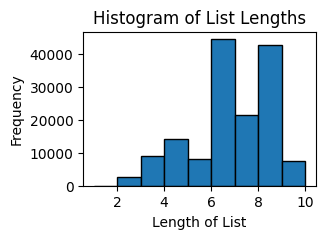

examples of len 1


79885    [All gift card orders for this merchant will b...
78635    [Product cannot be shipped to freight forwardi...
Name: features, dtype: object

example of len > 1 :  ['Gift Card is affixed inside a specialty box'
 'Gift Card has no fees and no expiration date'
 'No returns and no refunds on Gift Cards'
 'Gift Card is redeemable towards millions of items storewide at Amazon.com'
 'Scan and redeem any Gift Card with a mobile or tablet device via the Amazon App'
 'Free One-Day Shipping (where available)'
 'Customized gift message, if chosen at check-out, only appears on packing slip and not on the actual gift card or carrier']


In [65]:
plot_counts('features')

Data type: <class 'numpy.ndarray'>
Counts :  list_length_description
0     86023
1     66104
28      230
4        41
Name: count, dtype: int64


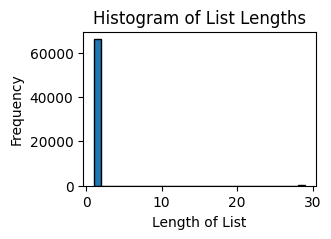

examples of len 1


126383    [Amazon.com Gift Cards are the perfect way to ...
126294    [Amazon.com Gift Cards are the perfect way to ...
Name: description, dtype: object

example of len > 1 :  ['What is a Flex Gift Card?'
 'Amazon.com Flex Gift Cards allow you to create an instant gift, whenever you need it. Simply follow the activation instructions below to add the dollar amount of your choice to the enclosed, inactive Gift Cards.'
 "Once you receive an email confirming activation, the card is ready for gifting and redemption at Amazon.com. It's a great gift that can be used at a moment's notice for any occasion."
 'Key Benefits' 'Store it at home for those last-minute gifts'
 "Keep Flex Gift Cards in your drawer for when you need a quick gift at a moment's notice. You no longer need to drive to the store or wait for delivery."
 'Activate and pay when you need it'
 'Add funds and activate the Flex Gift Card at your convenience by visiting'
 'amazon.com/activate.' 'Choose your own denomination'
 "Add any amount to the Flex Gift Card—from $1.00 to $2,000. These Gift Cards are flexible for any occasion, whether it's a wedding gift or even a small thank yo

In [66]:
plot_counts('description')

In [51]:
display(df['images_metadata'].iloc[0])

{'hi_res': array([None, None], dtype=object),
 'large': array(['https://m.media-amazon.com/images/I/41rPcyZJ3nL._AC_.jpg',
        'https://m.media-amazon.com/images/I/41sQl2wriGL._AC_.jpg'],
       dtype=object),
 'thumb': array(['https://m.media-amazon.com/images/I/41rPcyZJ3nL._AC_SR38,50_.jpg',
        'https://m.media-amazon.com/images/I/41sQl2wriGL._AC_SR38,50_.jpg'],
       dtype=object),
 'variant': array(['MAIN', 'PT01'], dtype=object)}

Data type: <class 'numpy.ndarray'>
Counts :  list_length_categories
3    139776
2     11156
0      1478
Name: count, dtype: int64


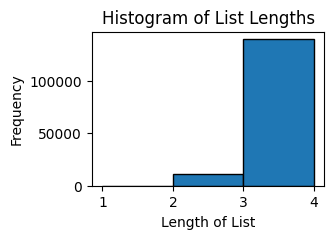

examples of len 1
example of len > 1 :  ['Gift Cards' 'Occasions' 'Chanukah']


In [67]:
plot_counts('categories')

Data type: <class 'str'>
Counts :  list_length_details
113    43505
180    15012
469     7781
467     7466
Name: count, dtype: int64


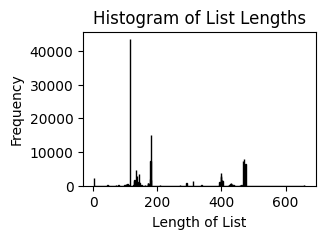

examples of len 1
example of len > 1 :  {"Item model number": "VariableDenomination", "Date First Available": "April 13, 2021", "Manufacturer": "Amazon"}


In [68]:
plot_counts('details')

In [70]:
# plot_counts('bought_together')
display(df['bought_together'].iloc[0])

None

# Information from the documentation


- Pure IDs (0-Core): Complete dataset
- Pure IDs (5-Core): 
    - Each user must have rated at least 5 different items.
    - Each item must have been rated by at least 5 different users.

# Conclusion

## Overall


## Metadata

- `main_category`(str - categorical): could be considered categorical
- `title` (str): text
- `average_rating` (float): numerical
- `rating_number` (int): numerical
- `store` (str): names of shops could be considered categorical data
- `parent_asin`(str - ID): unique string identifier
- `features`(list of str): could be concatenated
- `categories`: (list of str): product category path. could be spread on several columns or concatenated
- `description` (list of str): mostly empty
- `details` (dict str - str): various product details
- `price` (float): subscription boxes had empty prices. rest are ok

To drop:
- `images` (list of str): too complex
- `videos` (list of str): too complex
- `bought_together` (boolean): mostly empty
- other that are category specific : `author`, `subtitle`, ...


Notes : 
- no duplicate rows

## Review

- `rating`: numerical
- `title`: text
- `text`: text
- `asin`: unique string identifier
- `parent_asin`: unique string identifier
- `user_id`: unique string identifier
- `timestamp`: numerical
- `helpful_vote`: numerical
- `verified_purchase`: boolean

To drop:
- `images`: list of image URLs. -> dropped

Notes : 
- there are duplicate rows / aka reviews. -> Drop duplicates
